In [97]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

from PIL import Image
import requests
from io import BytesIO
import pytesseract

In [98]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [99]:
messy_df.head()

,created_utc,num_comments,subreddit,subreddit_subscribers,text,title,upvote_ratio,url,image?
0,1.502177e+09,840.0,TheRedPill,0.0,"As reported in Bloomberg, Google has fired a s...",Google Fires Ph.D Biologist/Engineer For Claim...,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False
1,1.480424e+09,759.0,TheRedPill,0.0,**A complete guide to picking up 9s and 10s** ...,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False
2,1.502101e+09,179.0,TheRedPill,0.0,**Practical Stoicism Tools**\n\nStoicism philo...,I have been practicing Stoicism for 3 years no...,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False
3,1.433962e+09,954.0,TheRedPill,0.0,The most notorious target was FatPeopleHate. Y...,"[META] Reddit rolls out first ban wave of ""Har...",0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False
4,1.500270e+09,336.0,TheRedPill,0.0,Kind of surprised this hasn't made its way her...,"Man gets his ex-GF to pay child support, and R...",0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False


In [100]:
#TODO: Image processing: do on windows machine because tessaract only runs on linux and windows

# image_text = []

# for index, row in messy_df.iterrows():
#     if row['image?']:
#         response = requests.get(row['url'])
#         image = Image.open(BytesIO(response.content))
#         image_string = pytesseract.image_to_string(image)
#     else:
#         image_string = ''

#     print(image_string)
#     image_text.append(image_string)


In [101]:
messy_df['total_text'] = messy_df['title'] + messy_df['text']

In [102]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [103]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [104]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                       The is Los Angeles, California
11005                                    Personal freedoms
11006                                  Progressive Liberal
11007                                                Welp…
11008                                  You guys were right
Name: total_text, Length: 11009, dtype: object

In [105]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur'] #commonly used reddit link words
stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
                 'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough',
                 'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
                 'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
                 'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [106]:
lemmatizer = WordNetLemmatizer()

In [107]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    #current = re.split(r'[^a-zA-Z]', string)
    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [108]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\agcwi/nltk_data'
    - 'c:\\Users\\agcwi\\anaconda3\\nltk_data'
    - 'c:\\Users\\agcwi\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\agcwi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\agcwi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
messy_df

,created_utc,num_comments,subreddit,subreddit_subscribers,upvote_ratio,url,image?,total_text,tokenned_stopped_text
0,1.502177e+09,840.0,TheRedPill,0.0,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,759.0,TheRedPill,0.0,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t..."
2,1.502101e+09,179.0,TheRedPill,0.0,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,..."
3,1.433962e+09,954.0,TheRedPill,0.0,0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,336.0,TheRedPill,0.0,0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...
11004,1.633457e+09,900.0,Anarcho_Capitalism,186148.0,0.88,https://v.redd.it/0ptsjdwh9or71,False,"The is Los Angeles, California","[los, angeles, california]"
11005,1.632157e+09,2229.0,Anarcho_Capitalism,186148.0,0.83,https://i.redd.it/xmgcuoawtoo71.png,True,Personal freedoms,"[personal, freedom]"
11006,1.591131e+09,141.0,Anarcho_Capitalism,186148.0,0.93,https://i.imgur.com/ticpuuy.jpg,True,Progressive Liberal,"[progressive, liberal]"
11007,1.638208e+09,506.0,Anarcho_Capitalism,186148.0,0.89,https://i.redd.it/dcyjbpirmk281.jpg,True,Welp…,[welp…]


In [ ]:
corpus_series = messy_df['tokenned_stopped_text']

In [ ]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [laid, warlord, 37, rule, approaching, model-t...
2        [practicing, stoicism, 3, year, quality, life,...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
11004                           [los, angeles, california]
11005                                  [personal, freedom]
11006                               [progressive, liberal]
11007                                              [welp…]
11008                                         [guy, right]
Name: tokenned_stopped_text, Length: 11009, dtype: object

In [ ]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [ ]:
new_corpus_series = pd.Series(new_corpus_series)

In [ ]:
len(new_corpus_series)

244214

In [ ]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('woman', 2470),
 ('people', 1481),
 ('men', 1400),
 ('trump', 1108),
 ('girl', 890),
 ('amp', 880),
 ('guy', 843),
 ('year', 798),
 ('go', 755),
 ('think', 754),
 ('day', 748),
 ('life', 743),
 ('man', 684),
 ('right', 642),
 ('good', 623),
 ('going', 604),
 ('first', 595),
 ('look', 538),
 ('work', 536),
 ('feel', 522),
 ('biden', 500),
 ('sex', 499),
 ('new', 486),
 ('made', 468),
 ('thing', 448),
 ('friend', 440),
 ('still', 438),
 ('feminist', 436),
 ('said', 426),
 ('president', 423),
 ('reddit', 416),
 ('well', 410),
 ('someone', 409),
 ('male', 401),
 ('fuck', 399),
 ('shit', 380),
 ('getting', 375),
 ('thought', 370),
 ('comment', 370),
 ('use', 369),
 ('love', 364),
 ('come', 363),
 ('world', 361),
 ('better', 356),
 ('give', 354),
 ('actually', 352),
 ('call', 352),
 ('sexual', 350),
 ('child', 347),
 ('edit', 344),
 ('point', 343),
 ('money', 343),
 ('tell', 343),
 ('2', 338),
 ('person', 337),
 ('say', 335),
 ('state', 327),
 ('keep', 320),
 ('without', 319),
 ('find', 31

In [ ]:
top_30 = most_common[0:30]

In [ ]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

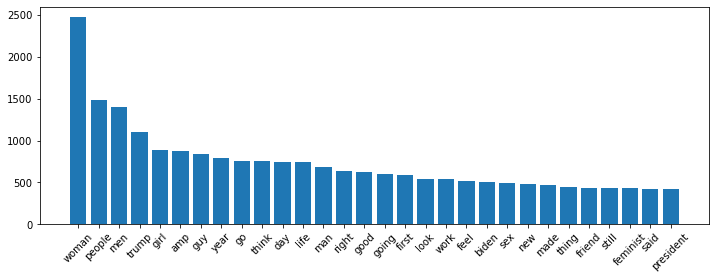

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

In [ ]:
# Pickle data for modeling

pd.to_pickle(messy_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [ ]:
lda_text = messy_df['finalized_text'].apply(lambda x: x.split(" "))

In [ ]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [ ]:
lda = LdaModel(corpus, num_topics = 10, id2word= corpus_dictionary)

In [ ]:
lda.print_topics(num_words = 20)

[(0,
  '0.015*"meme" + 0.006*"country" + 0.005*"woman" + 0.004*"made" + 0.004*"government" + 0.004*"texas" + 0.004*"wrong" + 0.004*"reminder" + 0.004*"found" + 0.003*"bitcoin" + 0.003*"go" + 0.003*"war" + 0.003*"2009" + 0.003*"right" + 0.003*"commie" + 0.003*"people" + 0.003*"guy" + 0.003*"communism" + 0.003*"feminism" + 0.003*"free"'),
 (1,
  '0.015*"woman" + 0.008*"true" + 0.007*"n" + 0.007*"truth" + 0.006*"black" + 0.005*"love" + 0.005*"fuck" + 0.005*"trump" + 0.005*"man" + 0.005*"men" + 0.004*"yeah" + 0.004*"people" + 0.004*"identity" + 0.004*"gay" + 0.004*"pill" + 0.003*"defending" + 0.003*"word" + 0.003*"e" + 0.003*"cop" + 0.003*"irony"'),
 (2,
  '0.017*"banned" + 0.013*"reddit" + 0.012*"" + 0.012*"trump" + 0.011*"incel" + 0.011*"amp" + 0.011*"trans" + 0.007*"woman" + 0.006*"mod" + 0.006*"hate" + 0.006*"ban" + 0.006*"twitter" + 0.005*"speech" + 0.005*"thread" + 0.004*"user" + 0.004*"donald" + 0.004*"maxwell" + 0.004*"ms." + 0.003*"subreddit" + 0.003*"capitalism"'),
 (3,
  '0.013*